In [1]:
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
## Root-Mean Square Energy and Zero Crossing Rate from Audio

In [2]:
woah_file = "woah-mono.wav"
tool_file = "tool-mono.wav"

In [3]:
woah, _ = librosa.load(woah_file)
tool, _ = librosa.load(tool_file)

In [6]:
# extract RMSE with librosa

FRAME_LENGTH = 1024
HOP_LENGTH = 512
rms_woah = librosa.feature.rms(woah, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)[0]
rms_tool = librosa.feature.rms(tool, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)[0]

/tmp/ipykernel_16415/4046651793.py:5: FutureWarning: Pass y=[-0.00168833 -0.00153105  0.00056015 ... -0.00381295 -0.00079223
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_woah = librosa.feature.rms(woah, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)[0]
/tmp/ipykernel_16415/4046651793.py:6: FutureWarning: Pass y=[-0.09220752 -0.16744752 -0.06855328 ...  0.15560749  0.03446521
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_tool = librosa.feature.rms(tool, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)[0]
/tmp/ipykernel_16415/4046651793.py:7: FutureWarning: Pass y=[-0.00225894 -0.00423238 -0.00345968 ... -0.00177927 -0.0018893
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_rip = librosa.feature.rms(rip, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)[0]


In [7]:
rms_woah.shape

(411,)

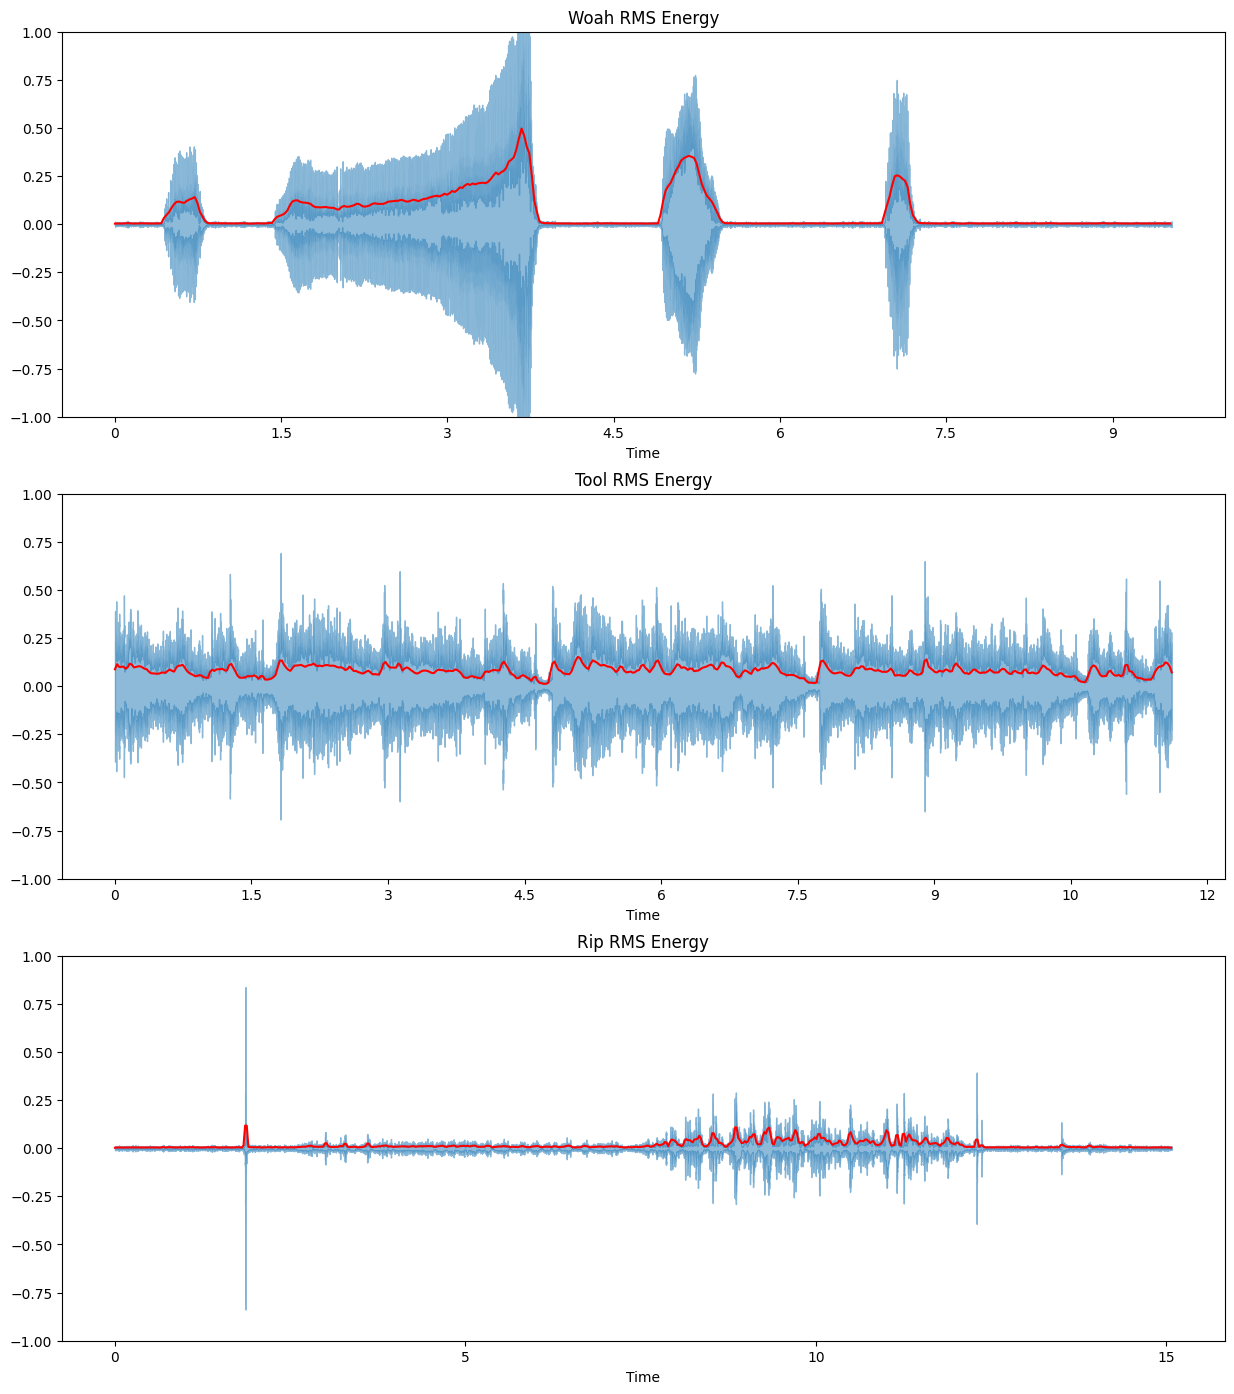

In [9]:

plt.figure(figsize=(15,17))

frames = range(0, rms_woah.size)
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)
plt.subplot(3,1,1)
librosa.display.waveshow(woah, alpha=0.5)
plt.plot(t, rms_woah, color="r")
plt.title("Woah RMS Energy")
plt.ylim((-1,1))

frames = range(0, rms_tool.size)
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

plt.subplot(3,1,2)
librosa.display.waveshow(tool, alpha=0.5)
plt.plot(t, rms_tool, color="r")
plt.title("Tool RMS Energy")
plt.ylim((-1,1))

frames = range(0, rms_rip.size)
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

plt.subplot(3,1,3)
librosa.display.waveshow(rip, alpha=0.5)
plt.plot(t, rms_rip, color="r")
plt.title("Rip RMS Energy")
plt.ylim((-1,1))

plt.show()

In [15]:
def rms(signal, frame_length, hop_length):
    return np.array([np.sqrt(np.sum(signal[i:i+frame_length]**2)/frame_length) for i in range(0,len(signal), hop_length)])

In [16]:
our_rms_woah = rms(woah, FRAME_LENGTH, HOP_LENGTH)
our_rms_tool = rms(tool, FRAME_LENGTH, HOP_LENGTH)

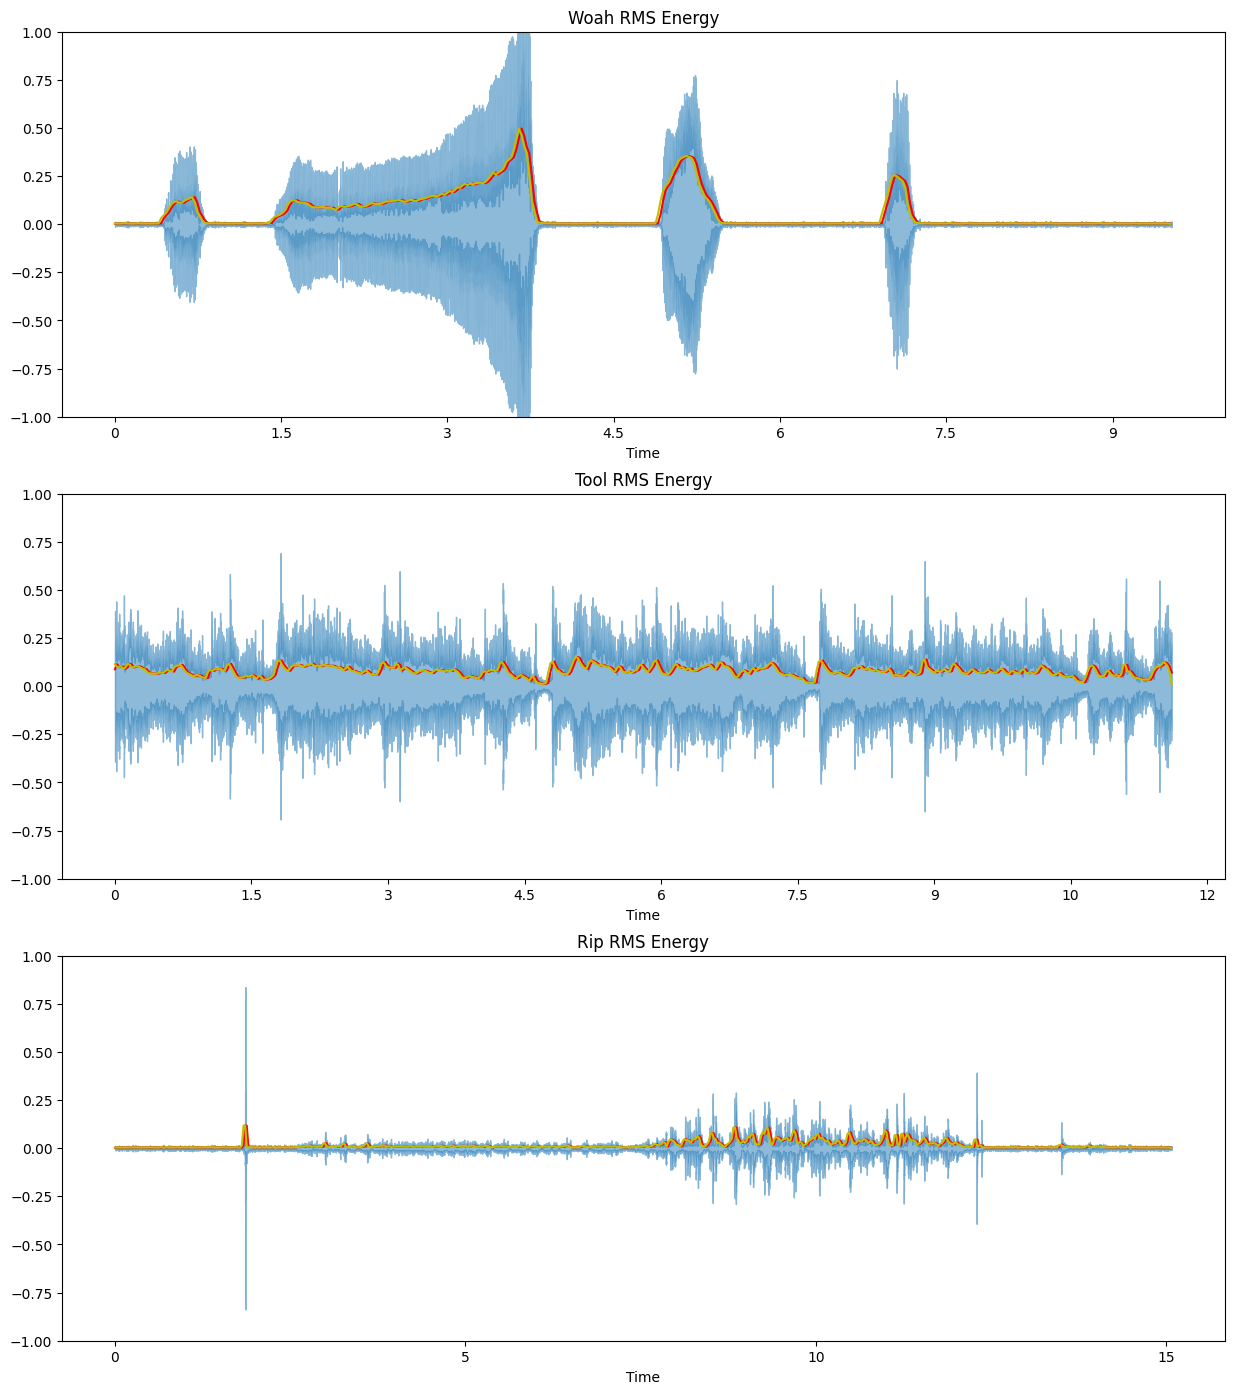

In [17]:
plt.figure(figsize=(15,17))

frames = range(0, rms_woah.size)
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)
plt.subplot(3,1,1)
librosa.display.waveshow(woah, alpha=0.5)
plt.plot(t, rms_woah, color="r")
plt.plot(t, our_rms_woah, color="y")
plt.title("Woah RMS Energy")
plt.ylim((-1,1))

frames = range(0, rms_tool.size)
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

plt.subplot(3,1,2)
librosa.display.waveshow(tool, alpha=0.5)
plt.plot(t, rms_tool, color="r")
plt.plot(t, our_rms_tool, color="y")
plt.title("Tool RMS Energy")
plt.ylim((-1,1))


plt.show()

In [18]:
# Zero crossing rate
zcr_woah = librosa.feature.zero_crossing_rate(woah, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)[0]
zcr_tool = librosa.feature.zero_crossing_rate(tool, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)[0]

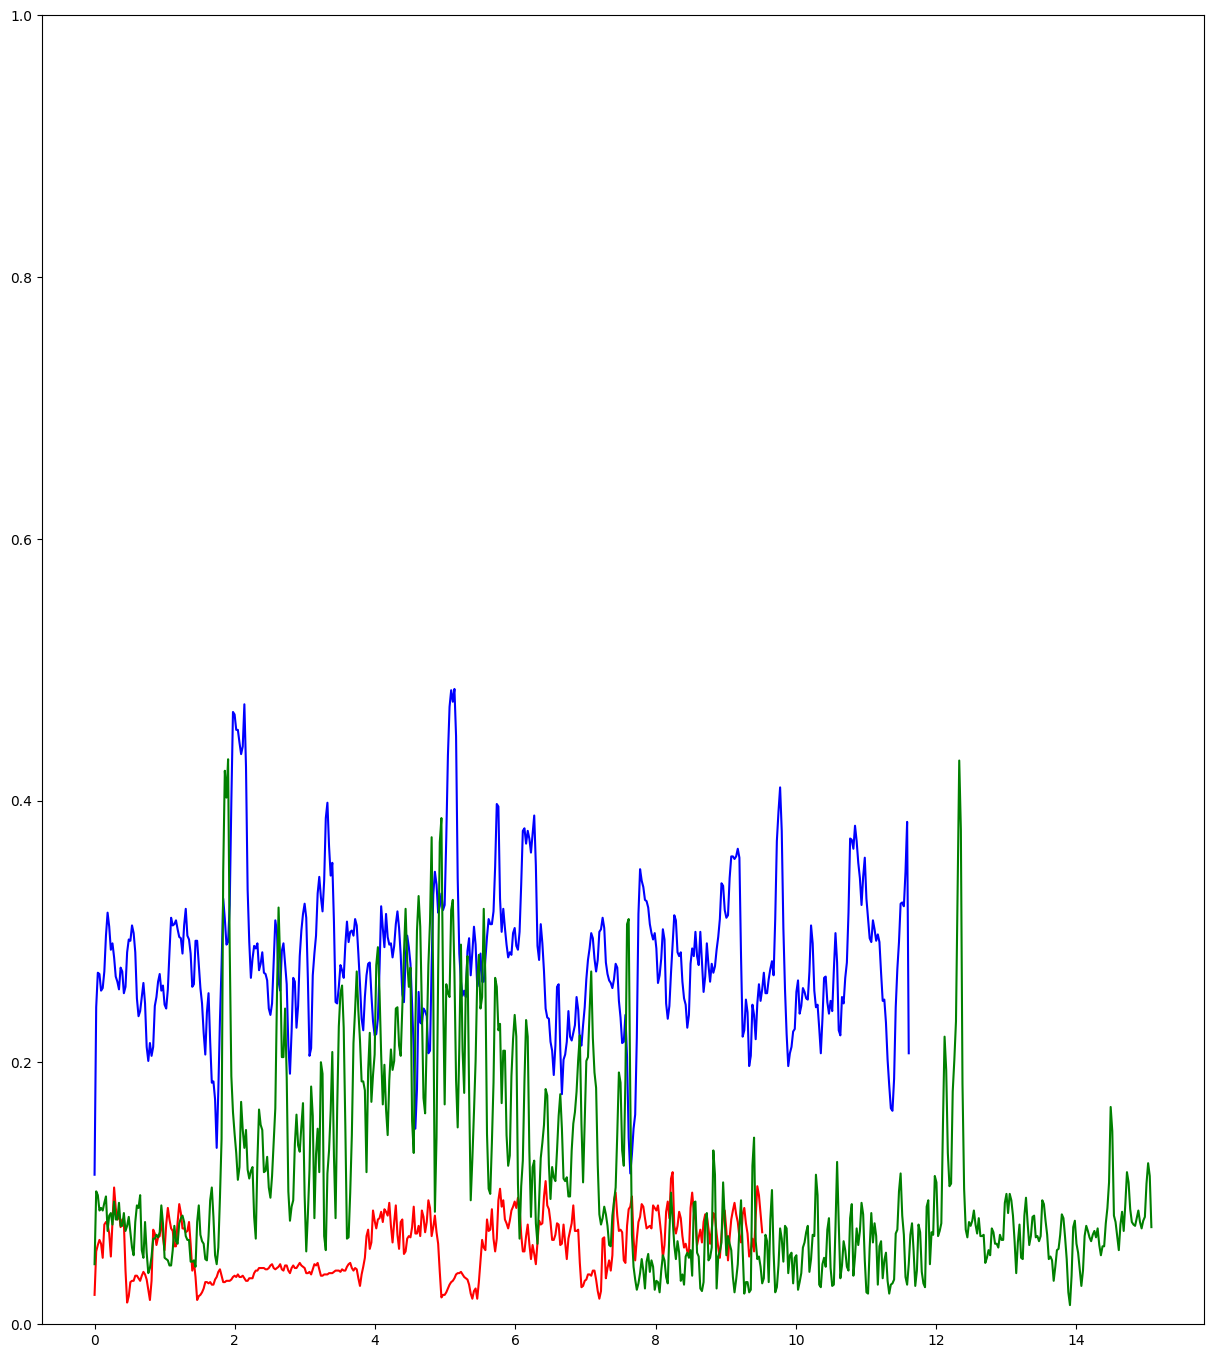

In [20]:
plt.figure(figsize=(15,17))

frames = range(0, rms_woah.size)
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)
plt.plot(t, zcr_woah, color="r")

frames = range(0, rms_tool.size)
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)
plt.plot(t, zcr_tool, color="b")

plt.ylim((0,1))
plt.show()